**FINAL PROJECT**

---

Nama Anggota:
1.   Firlisa Anggraeni (1301184103)
2.   Putri Nurika Adila (1301184309)

Kelas: IF-42-GAB01

---

**Import Library**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import networkx as nx
import os
import re

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.simplefilter(action='ignore')

# Data Exploration

In [ ]:
#read data
df = pd.read_csv("/Users/putrinurika/Documents/Kuliah🎓/SEMESTER 7/AJS/TUGAS/TUBES 2/tweets_v8.csv")
df.head(10)

user_name    user_location  \
0   the _ûndër-ratèd niggáh👊🏾              NaN   
1  Best uncle on planet earth              NaN   
2                      marcie              NaN   
3                    YoMo.Mdp    Any pronouns    
4             Laura Reactions           France   
5                  Peyman 🅚🅐🅘   United Kingdom   
6                   Aeriaaaa♡              NaN   
7          BarBiE Fábregas 🇿🇦     South Africa   
8              Joel D. Parker              NaN   
9                Kevin Franco  Calgary, Canada   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   
5  Official @KardiaChain $KAI Ambassador\nMarketi...   
6  Fujoshi 🙈/ Thai BL-obsessed/Always distracted ...   
7  Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...   
8  Ph.D. in history of 20th century Levant. Somet...   
9  When it comes to describing myself in a one li...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   
5  2018-01-27 12:07:31+00:00             546           318             6265   
6  2021-06-01 14:08:10+00:00              14           110              518   
7  2011-03-28 18:56:28+00:00            1877          2057            33186   
8  2010-07-01 07:26:44+00:00             621          1346             5345   
9  2009-05-11 20:14:51+00:00            1027           278            20902   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   
5          False  2021-10-06 12:04:54+00:00   
6          False  2021-10-06 12:04:45+00:00   
7          False  2021-10-06 12:04:26+00:00   
8          False  2021-10-06 12:04:22+00:00   
9          False  2021-10-06 12:04:10+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   
5  $THG\nGoing to explode to 4B Marketcap very so...  Twitter for Android   
6  @B_hundred_Hyun pls use that gun on me. 😩 \n\n...  Twitter for Android   
7  Please vote in my daily poll. \nThanks. 😊\n\nD...   Twitter for iPhone   
8  I've seen bi-lingual Korean speakers slam the ...      Twitter Web App   
9  I discovered English audio after 5 episodes of...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False

In [ ]:
df.shape

(80019, 12)

Terdapat 80.019 baris data dan 12 kolom

In [ ]:
#cek tipe data
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
source              object
is_retweet            bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [ ]:
df.describe()

user_followers  user_friends  user_favourites
count    8.001900e+04  8.001900e+04     8.001900e+04
mean     1.794587e+04  1.071020e+03     1.796449e+04
std      2.451159e+05  6.751348e+03     4.850358e+04
min      0.000000e+00  0.000000e+00     0.000000e+00
25%      6.200000e+01  1.180000e+02     4.420000e+02
50%      2.910000e+02  3.930000e+02     3.028000e+03
75%      1.183000e+03  9.860000e+02     1.494000e+04
max      1.684642e+07  1.211576e+06     1.144792e+06

# Preprocessing Data

> **Cek Missing Value**

In [ ]:
df.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [ ]:
df.drop(columns=["user_description","user_location"], inplace=True) #hapus kolom "user_description" dan "user_location" karena tidak digunakan
df.dropna(inplace=True) #deleting rows pada kolom "user_name"
df.reset_index(inplace=True)
df.drop(columns="index", inplace=True)
df.head(10)

user_name               user_created  user_followers  \
0   the _ûndër-ratèd niggáh👊🏾  2019-09-06 19:24:57+00:00             581   
1  Best uncle on planet earth  2013-05-08 19:35:26+00:00             741   
2                      marcie  2009-02-21 10:31:30+00:00             562   
3                    YoMo.Mdp  2021-02-14 13:21:22+00:00               3   
4             Laura Reactions  2018-12-19 20:38:28+00:00             330   
5                  Peyman 🅚🅐🅘  2018-01-27 12:07:31+00:00             546   
6                   Aeriaaaa♡  2021-06-01 14:08:10+00:00              14   
7          BarBiE Fábregas 🇿🇦  2011-03-28 18:56:28+00:00            1877   
8              Joel D. Parker  2010-07-01 07:26:44+00:00             621   
9                Kevin Franco  2009-05-11 20:14:51+00:00            1027   

   user_friends  user_favourites  user_verified                       date  \
0          1035             8922          False  2021-10-06 12:05:38+00:00   
1           730             8432          False  2021-10-06 12:05:22+00:00   
2          1197            62732          False  2021-10-06 12:05:22+00:00   
3           277             1341          False  2021-10-06 12:05:04+00:00   
4           152             2278          False  2021-10-06 12:05:00+00:00   
5           318             6265          False  2021-10-06 12:04:54+00:00   
6           110              518          False  2021-10-06 12:04:45+00:00   
7          2057            33186          False  2021-10-06 12:04:26+00:00   
8          1346             5345          False  2021-10-06 12:04:22+00:00   
9           278            20902          False  2021-10-06 12:04:10+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   
5  $THG\nGoing to explode to 4B Marketcap very so...  Twitter for Android   
6  @B_hundred_Hyun pls use that gun on me. 😩 \n\n...  Twitter for Android   
7  Please vote in my daily poll. \nThanks. 😊\n\nD...   Twitter for iPhone   
8  I've seen bi-lingual Korean speakers slam the ...      Twitter Web App   
9  I discovered English audio after 5 episodes of...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False

In [ ]:
df.isnull().sum()

user_name          0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
dtype: int64

In [ ]:
df.shape

(80015, 10)

Setelah menghandle missing value, ada sebanyak 80.015 baris data dan 10 kolom

> **Clean Text**

In [ ]:
text = []

for i in range(len(df)): 
  #menghapus beberapa karakter pada tweet menjadi string kosong " "
  clean_txt = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(df["text"][i])).split()) 
  text.append(clean_txt)
  print(clean_txt)

When life hits and the same time poverty strikes you Gong Yoo Lets play a game SquidGame Netflix
That marble episode of SquidGame ruined me
Squidgame time
Blood on 1st slide I m joining the squidgame thing I m already dead by sugar honeycomb ofc SquidGame
The two first games players were killed by the mask guys the bloody night and the third game they killed each o
THG Going to explode to 4B Marketcap very soon The world first MOBA This game is on another level
hundred Hyun pls use that gun on me BAEKHYUN EXO weareoneEXO SquidGame
Please vote in my daily poll Thanks Do you think Donny van de Beek should leave Manchester United Yes OR No
I ve seen bi lingual Korean speakers slam the SquidGame translation but I could feel the quality of the writing d
I discovered English audio after 5 episodes of Squid Game in Korean with subtitles I m used to watching foreign fi
The struggle is VERY real SquidGame
squid game 2021 deaths and foreshadowing MAJOR SPOILERS cw blood gore squidgame
friendship

I did this fan art for my fav character in the squid game I don t normally do this but I m glad I did
That ENDING SquidGame omg
tbh lorde is the best character in squid game SquidGame
I Really Do Wonder What The Script Writer Was Experience Mentally For Him To Write Such A Thrill Of A Show SquidGame
Love player 199 Maybe staff 29 will marry outside this Eeeewwwwwww not the licking SquidGame
This show is wild SquidGame
shows that give me nightmares squidgame
SQUIDGAME 1 via Inserting topical and fascinating Plus scary with heavy
ROUND 2 LATER With 72 Survivors SquidGame SquidGames SlpGiveaway
Still haven t watched it yet but y all forgot about the OG SquidGame
I just started AliceInBorderland because clearly SquidGame wasn t anxiety inducing enough I hope the ending i
You re a good person at heart Integrity over everything SquidGame
I started watching SquidGame last night really can t see what all the fuss is about Hopefully the next few will
HOT FOR HALLOWEEN 2021 Squid Game Jumpsuit F

everytime she come on the tv i stop reading the subtitles SquidGame
Yo yo yo You don t know how bad my luck is Here s a proof for you Don t miss it out facebookdown
DUDE I OUT HERE CRYING MY FUCKING EYES OUT OVER SquidGame I HATE MY LIFE OH MY GOD AAAAAAAAAA
Episode six from SquidGame got me like
I m on episode 7 amp sitting here like wtf This shit good as hell but crazy af SquidGame
SquidGame had no right making me cry so hard Episode 6 screwed me up so bad in the feelz
What are you going to do if you end up in a hospital and all the nurses wore this SquidGame
Here s an opinion In Squid Game the total prize money that was introduced to the players after the first match w
I ve heard Korean dramas have become so popular because the writing comes from the Seoul Ha ha ha ha ha ha ha
Dude came in clutch with that last second grab Just for that he better survive SquidGame
You see everybody getting shot due to movement and you continue trying to run away SquidGame
Why everybody wanna beat th

SquidGame love it
DAMAGER SquidGame serverdown PandoraPapers EmmaRose gensaidit Trending
Not feeling the appeal of SquidGame and I m done with episode 3
Here s other versions art drawing illustration SquidGames squidgamenetflix squidgamefanart Round6
Just wanted to make some noise here Drawing Saebyeok SquidGame Saebyeok
Shout out to all the trendy whites finally realizing how good K Flix originals are SquidGame kingdom
I wanted to draw Saebyeok since the very first episode I m still so sad about her Did you watch Squid Games Ro
My Government should sign up for this game abeg Let s see who will return home with our treasure Awon Debtors oshi
Front Man mask SquidGame squidgamenetflix 3dprinting cosplay
Remember babes getting rejected means they re just stupid and you re destined for something better SquidGame
Just finished SquidGame and I have thoughts
Going LIVE on Twitch in a few moments B1G Announcement today Also going to be doing some SquidGame inspired 3D
thanks for playing with m

God is playing a game long before the squid games playingwithourlives SquidGame
Alternating episodes of Taskmaster and SquidGame Life is weird and great
Jumped on the bandwagon SquidGame
Simping for Player 067 SquidGame
Absolutely hooked on SquidGame
squidgamenetflix SquidGame Man I can t watch complete the E6 It was so hard to complete Like I felt it
Namie Amuro was in the SquidGame too
Squid game versao 1 SquidGame squidgamefanart squidgamenetflix Splatoon2
These mfs how do you guys watch SquidGame without getting pissed
Loving the squidgame one Wish I copped it
When you re on the SquidGame but don t know math
I m 5 episodes in and i want player 001 to win the SquidGame
When is the new season for SquidGame
I ve been playing LostJudgement and watching SquidGame dubbed has essentially invaded all the things
Don t bother with the last episode SquidGame
Never give up SquidGame
Spoilers for SquidGame but I had to repost it because it s so funny and true
Everyone else keeps reaching for th

i wanted them to kiss squidgame
My hands look like this so my art can look like this SquidGame Saebyeok
Man you all were right This SquidGame IS f ked up
every game they played has been on the walls the whole time SquidGame
I wonder what the score would be like from the complete perspective of a worker SquidGame Netflix WhatIf
tiktok will forever crack me up SquidGame
Episode 6 hit right in the fucking feels SquidGame
I knewwwwww there was something fishy about that old guy squidgame
So true Also such a good show SquidGame squidgamenetflix gamer playstation
Baby I need to know ohh wihajoon SquidGame squidgamenetflix SquidGames kdramaiil lt her edit gt
The point of no return NOONE Join the quest on TG Website
Just finished SquidGame Probably the best thing I have watched this year
Watching SquidGame and one question Is there no security or cameras in the train station to see someone being sla
Just missing X SquidGame
Tug of war SquidGame
Watched SquidGame A bit of mixed feelings for thi

1 episode of BloodandWaterS2 has been 100 times better than the whole season of SquidGame
Pakistani Character in SquidGame is so stereotypical
He s my favorite your honor SquidGame aliabdul
she lives in my mind rent free so i just had to draw her lt 3 hooyeon HoyeonJung HoyeonFanart SquidGame
Episode 6 of Squid Game name dropping Lee Byung hun while he s acting in the actual show is tripping me out
SquidGame director Hwang Dong hyuk says Season 2 may focus more on Player 001 s backstory If there will be a sea
SquidGame is more fun when you watch it on 1 5X
how come Ali didn t know how to play Kanchay Bro you must have played that juft tag in your childhood Are you eve
That Gganbu SquidGame episode
So I finished SquidGame
squid game SquidGame
You remind me about my scribble of this SquidGame actor
Would you like to play a game with me JujutsuKaisen SquidGame
Red light Green light for all don t take vaccines let s play SquidGame squidgamenetflix
You can skip episode 2 of the SquidGame bt

456 in episode 3 of SquidGame
2 episodes into SquidGame Is this the mmo version of Saw
Food Insider saw it first SquidGame
Here s the second wave of sketches for some mutuals on SquidGame squidgamefanart
So on top of a 400 energy bill increase in spring we ll now be looking at massive good price rises too as compani
Whether or not you re into bloody on screen deaths the hype is hard to ignore SquidGame
My feed is full of SquidGame and crypto Not bad
I am glad you are enjoying as much as we are It is quite clever and touches on human nature in its
Making Squid Game Honeycomb Food SquidGame Honeycomb
DANCING CHIBIs x SQUID GAME SquidGame NFTs
To different feelings Squidgame
Squid who stand up for equal opportunity DO YOU WANT TO PLAY A GAME SQUID FOR BATTLE ROYALE NFT
They d be best friends SquidGame milky fujiyamilky pekochan
FCReadersWrite How does a show that is so culturally and socially specific to South Korea becomes a Netflix hit
squidgame So who is moving onto the next round
Too 

Just finished SquidGame what a fucking ride
Just finished SquidGame oh my goddddd
Ali dies in SquidGames SQUIDGAME Sang Woo betrays him
Also the last part of SquidGame where they tried to portray Sang woo as a gOoD mAn just cause the mf was dying Didn t work sadly
This SquidGame interview is gold congratz on having the No 1 show FallonTonight
They just came to watch in person on another screen SquidGame
NO WAY SquidGame
They were so cute SquidGame fallontonight
Squid Game Way Back then Blogger Wei Nin Violin Studio
thankyou for having them on it was a great interview SquidGame
If I had created SquidGame I would have started the series focusing on multiple characters so it ll be less obvio
Finally watched SquidGame Ep 1 Pretty solid Fascinating to watch something become a sensation in a matter
We are so happy for your success Those games were fun SquidGame FallonTonight
Same SquidGame
Me during The Tonight Show Starring Jimmy Fallon SquidGame Netflix WiHaJoon
Wtf how is Old man alive Sq

SquidGame is so damn stressful This show is incredible but damn
player 199 color study SquidGame SquidGames squidgamefanart Netflix squidgamenetflix PLAYER199
It s my chance at SquidGame SquidGames let s go shibainu I want that piggy bank full of cash money crypto
I would never kill anyone as a job Wait are those the uniforms What I m thinking about it You have to a
After watching SquidGame you ll never look at a PlayStation controller the same again
Quick wip and nae nae SquidGame
How this is getting out of hand SquidGame juegodelcalamar
SquidGame was good is hell lol
I would 100 rather read subtitles than be thrown off by poorly dubbed audio SquidGame
Ali really blew a 19 1 lead SquidGame
Come watch plz twitchleak YGLetLisaDoHerJob SongJoongKi SquidGame facebookdown twitch twitchstreamer
New Crypto added to Learn and Earn on Coinbase Don t sleep on that free crypto If you re new Get 10 of F
This is literally me every time I watch any foreign film in a language I speak on It s not jus

checking on your stocks and or crypto during this economy is basically your own lil version of SquidGame might
It s over SquidGame has ruined Halloween this year Hope you re all looking forward to seeing this shit on the 31
There better be answers about who the game masters are and why they are doing this SquidGame
About to watch Squid Game Will post my reaction to every episode under this thread so look out SquidGame I just
I love SquidGame
SquidGame spoilers this guy was terrible but such a great addition to the showw but Hoyeon carried
Netflix s dystopian survival drama SquidGame which is on track to become the platform s most watche
SquidGame fans think the police officer is alive
Starting SquidGame tonight Finally get to see what the hype is about
Now why they ain t end it until the old man said his ass was scared squidgame
Bet the cop in SquidGame wish he brought a chargeable battery pack with him
blackpink AFazenda Vincenzo HometownChaChaChaEp12 MyUniverseNo1onHot100 jikookau Bo

Get Followers And Streams From Real People growyourfollowers Spotify spotifypromotion GenocideinGaza
My god The marble episode SquidGame
GAS MAX Player Agent 1806 reporting for duty HugLife
The BIG question is how do they put the paper there SquidGame
SquidGame UK featuring Blind Man s Buff Conkers and Heads Down Thumbs Up
jung hoyeon yall i might ve held my breath for some good seconds JungHoYeon SquidGame
Player Agent 1806 reporting for duty HugLife KoalasAreComing SquidMyKoala
The way my mouth got moist af when he showed up on screen squidgame
i fucking learned how to write the red ligjt green light song thingy mid shift today wrote it from memory now lmao
Just finishing SquidGame still cannot name a single one of the characters
Player 456 067 the girl that doesn t smile and Ali were the players I liked in SquidGame
Imagine Squid Game in the UK the carnage caused playing Musical Chairs would be epic SquidGame
twitchleak YGLetLisaDoHerJob SquidGame DansNext DanNext DisneyPlus GomoraM

Watching GGANBU episode SquidGame
i wasnt surprised w the old man twist he was always sus esp the way he was so fearless since the start and that one
Making the dalgona candy round is more difficult than you think Most of mine turned into blobs SquidGame
SquidGame is proving communism isn t possible And capitalism is corrupt Yea let s talk about it
SquidGame MoneyHeist Soory we re not same bruhhh Your fav MY fav
This is also why I suggest using a small pot instead of a ladle Sometimes when I mixed the sugar some of the suga
SquidGame JoonHo with bodymovin
SquidGame If you had to make 40 million in 8 years how would you do it
Squid game on roblox SquidGame roblox SongJoongKi SquidGame
This SquidGame is mental
What if the last two people gotta play rock paper scissors SquidGame
stream SquidGame JoonHo with bodymovin
Making the dalgona candy is harder than it looks Almost burnt my hand using the ladle method because it takes time
What if all this time Takeshi s Castle was just us watching

I finally watched SquidGame on Netflix after seeing so many tweets about it I haven t binged in a longgggg time but man is it good
People are going to overdo SquidGame to the point of exhaustion just like Money heist
After deeping it everyone who went uni would be given a chance to play in the squid game some of you haven t even
SQUIDGAME is not just a game
Seems like we should celebrate the studio exec who greenlit Squid Game maybe it will encourage a few
Nah I can t get over this how Sang woo let ya boy beat him in the last round This can t be the same Sang woo
If I was in Squid Game Go check it out SquidGame SquidGames squidgamenetflix
Was anyone else getting toxic malicious gay f ggottry from the VIPs in Squid Game SquidGame
Would have preferred more games and less VIPs SquidGame
I wish they showed how that guy and his wife played the game and how he managed to win his wife in the Marble game
SquidGame I would have chosen the red card amp demand to wear one of those stone faced mas

Squid Game ma sono Lillo e Greg che commentano Takeshi s Castle SquidGame lilloegreg
Right But for me it would be SweetHome SquidGame KINGDOM Yeah massive horror genre fan
Thoma in Squid Game thoma GenshinImpact genshinimpactfanart FANART Genshinfanart squidgamefanart SquidGame
UAE fans of SquidGame will get the chance to try the games seen on the hit Netflix show during an event organi
Love s SquidGame Try one of these brilliant K dramas next tv netflix kdramas
Is SquidGame Star Jung Ho Yeon Really Obsessed With Dogecoin Benzinga via
Let me kill it both are good But SquidGame is another level
His hair stylist played him SquidGame
We ve got the Green Light Are you ready Stay tuned for SOP updates SquidGame UniCyberjaya
What are the common points between SquidGame and HouseofSecrets HouseofSecretsTheBurariDeaths
Today I observed the similarity between button in my online office meeting on google meet and the logo of Sq
Squid Game is worth the hype SquidGame SquidGames squidgamenetflix
A

whew lawd i know he lyin through his teeth w his nervous nelly lookin ass squidgame
I survived kinda wanted to break it though SquidGame squidgamenetflix SquidGameEp1 SquidGameEp2
WIHAJOON you makes me wanna fall in love lt 3 SquidGame
I didn t even clock that this scene meant he was trying to commit suicide uno I must be slow SquidGame
Squid Game EP4 Never seen anything like this Netflix gave a flickering lights warning but I didn t expect it to be
Squid bob SquidGame
And here I thought SquidGame was the worst thing I saw this month HouseofSecretsTheBurariDeaths
I haven t seen Squid Game and don t watch TV in general but I might have to start for the sake of this show Seems
Just finished SquidGame and let me tell you my ass would have gotten on that damn plane
What would a hood SquidGame look like though
I went down the rabbit hole that is SquidGame and I m hooked
If ANKHIYON SE GOLI MAARE had a face SquidGame
So is recommending SquidGame INSouth
This that show y all won t shut up abo

SquidGame NFTs unique from the famous series by lucasart NFTGiveaway NFTcollections
What happened to Ali in SquidGame is despicable tbh
SquidGame is something different and special Believe the hype
I propose Pro Bowl SquidGame this year Who wants to see if got the same sturdy hands with Dalgona
I m a sucker for both dystopias and deadly game show style contests I ve also seen soooo much of it that I ve beco
I ve finished SquidGame and BadArtFriend so dm me about your thoughts on the discourse s
My favorite thing about Squid Game is how it lets pauses play out so naturally Not a single other show movie etc
I finished SquidGame so I get all the memes now What a show
Is this that SquidGame everyone s talking about GodOfWarRagnarok
SquidGame was tripe Don t me
First commission YCH from SquidGame Thanks for commission me furry furryart furryartist
Order from Amazon Order From Daraz squidgamenetflix SquidGame
not them on his ass already literally coming from tunnels and shit lmaoooooooooooo 

Everybody on social media recommending SquidGame
But in fact this show reminds me of Kaiji anime while I m watching the first episode Not by the nature of the g
Dude ain t ain t right for doing Ali like that SquidGame this marble episode is ROUGH lol
Episode 6 Me to me It s just a series Also me SquidGame
Do you think an engineering or projectmanagement background could ve helped you beat all the games featured in
Starting SquidGame and for me is just another korean tv series because I m already obsessed with kdrama
SquidGame Memes my own
And now I can add SquidGame to my finished anxiety watchlist Great series interesting well written well acted
SquidGame my favvv
Giving SquidGame a go If it s a gory version of the classic BishiBashi I still have this and my ancient PS in s
Pre order if you are interested chat me up call or whatsapp vikky08034934315or add me directly on whatsapp with
Finished SquidGame last night The acting and script surrounding the VIPs terrible I didn t love the la

Just finished SquidGame and omgggggg It s crazyyyyy
Fan Art Squid Game SquidGame Netflix OpenSeaNFT 3dart 3dartwork illustration SmilingHeads fanart
My entry for meme contest RigelProtocol RGP AXS
I wanted to hate 218 too but honestly he put emotions aside and played to win with logic It was a life or death
Squid Game Spoilers SquidGame squidgameedit
THE EMOJI PLEASE HEO SUNG TAE IS JUST ADORABLE squidgame
Can we say SquidGame is inspired from Funhouse
Ne er a truer word spoken squidgame oldaf needsleep
I m sorry but SquidGame is absolute dogshit Whoever thinks this is good have lost their marbles Don t waste your
You ve seen SquidGame but are you ready for the SquadGame Thanks to the hilariously twisted mind of
I would have gone with a picture of him after he peed his pants SquidGame
Kdrama fans are pissed that everyone who dissed kdrama like SquidGame Squid games was rejected by the kdrama indu
Hear me out this would be really great to bring back now NetflixParty XboxLive BringItBack

the doll can dance babushka squidgame
Nothing like watching SquidGame in the morning and hearing your neighbors squirm
when i find out junichi suwabe is the voice actor of that man in suit the man who plays ddakji with gi hun that
Squid game spoilers very short animatic because I can never finnish long ones done on flippaclip animatic
The immensely popular Netflix show SquidGame has again brought Korean content into OTT spotlight We give you a l
Episode 6 Broke me SquidGame
OMG THE BEST GenshinImpact SquidGame
I enjoyed SquidGame but wtf was that ending about
I don t know why but I think she can survive the squid game squidgame
my fearless one SquidGame HoYeonJung
Well that was a whole rollercoaster Going to take some time to digest all of that tbh SquidGame
it s been a while but decided to pick up drawing again squidgame
Okay I finally finished SquidGame and I have QUESTIONS spoiler alert So was the head guy in the silver ro
Almost the entire time I watched I could not for the life of

2 18 A M and I m over here biting my nails watching SquidGame
I FCKING HATE THIS SHOW SquidGame
Real dilemma SquidGames SquidGame
Well that ended disappointingly SquidGame
Ok I just started watching SquidGame bye I m stressing fndnjdjdjd
Baal pink karwaney hai bus Thats the goal SquidGame
Okay I Googled SquidGame what in God s name is wrong with you people So basically it s about an evil group of
Stalinist Russia Maoist China Johnson s SquidGame
What the fuck did I just watch SquidGame
Starting SquidGame here we go
chilumi tartaglia lumine SquidGame GenshinImpact I love them
SquidGame I apologise I judged u too soon
I enjoyed SquidGame a lot It s got a lot of foreshadowing and detail that you will miss on first watch Also it
Netflix has edited a phone number that appears in its global hit series SquidGame after South Koreans who use it
Been on repeat for 2days now Hooked Understatement SquidGame Letsplay
Guys does not host the Squid Game SquidGame SquidGames
Episode 4 of SquidGame Wtf 

SquidGame Marble episode
SquidGame overlooks security redundancy by the staff Kind of hard to get past but I am hooked in to see how it ends
It seems as if all the people watching Squid Game has inadvertently crashed internet service for th
That s awesome Well played NewYorkForever SquidGame
Is Mary in a SquidGame she just can t get out of the way y all drag me I m dead More trauma More Mary
SquidGame Oppa SHOULD NOT be translated as Old Man It is an informal friendly term from a girl to a
I need some SquidGame gear in my closet where it at
SquidGame Entering 2019 Exiting 2021
Square Guard Guy squidgamefanart SquidGame
So they sent them home and they lost a day they said 6 days now yall made it longer SquidGame
Okay I have been working my way back up to watching horror movies and junk by reading a ton of horror manga this p
Apparently a North Korean website has praised SquidGame for its portrayal of South Korean capita
SquidGame VIPs are all men
ALSO THAT THE VIPS ARE WHITE AMERICANS T

Ugly sobbing She forgot and asked her to go to Jeju TWICE SquidGame
137 Karmaland4 karmaland SquidGame SquidGames ElJuegoDelCalamar
013 Karmaland4 karmaland SquidGame SquidGames ElJuegoDelCalamar
Wow Squid game is a bit full on Loving it SquidGame
I ll never play Ker Plunk ever again SquidGame
What if Gi Hun 456 found this in his Dalgona candy SquidGame SquidGameMeme SeongGiHun Player456
FIRST BLOOD SquidGame ukrart
Did you know Squid Guards were originally going to wear a Boy Scout like uniform This was a better choice
Anyone else obsessed with Squid Game There s a popup in Itaewon and we think a trip to South Korea is in order
SQUIDGAME 06 uhhh uhhh do i or do i not want to blind my friends with the ahegao coom version of this work
Watching episode 6 of SquidGame for the second time does not make it any easier
SquidGame making waves on Twitch
they chill 24067 squidgame
MASK ON ITS WAY I m getting the mask from the notorious SquidGame Going to make a sexy profile picture feel fr
Start

Episode 6 of Squid Game had me crying like that first phone call home to your mom when you re at sleep away camp do
Do falling humans make a sound when they land squidgame foleyartist
SquidGame fanart cause I recently finished watching it with friends
I m confused asf as to why dude ain t went and see his daughter at the end of SquidGame
Bird I m with ya Idk what it is or the hype of it all SquidGame idk thehype
Hey there sharing my unique curation trying to get it out there Hoping for some traction
NFT Hey there sharing my unique curation trying to get it out there Hoping for some tractio
rem Hey there sharing my unique curation trying to get it out there Hoping for some traction
Hey there sharing my unique curation trying to get it out there Hoping for some traction
Hey there sharing my unique curation trying to get it out there Hoping for some traction
Hey there sharing my unique curation trying to get it out there Hoping for some traction
Hey there sharing my unique curation trying

Feel like I m the last person on earth to wactch it but finally starting SquidGame on
So my 84 yr old mam is telling me to watch SquidGame as she is hooked and loves it
Everyone is giving a green light for SquidGame including us Would we survive More in our latest podcast ep
Change my mind squid game is good but not that good and very overhyped squidgame
Can you survive this SquidGame
Yes SquidGame is overrated but that doesn t mean it s bad Calling it the best series Netflix has ever done is
I finished this drawing SquidGame squidgamefanart squidgamenetflix art digitalart
I ve just finished squid game and omg I don t know what to think The ending shocked me But such a good season SquidGame
Does your perfect date night involve an outdoor cinema Maybe a Netflix binge and picnic in the garden Or maybe ju
I also enjoy that s profile picture looks like the umbrella cookie SquidGame
the winner takes it all the loser has to fall reibert x SquidGame aot
SquidGame Shatters s 28 Day Viewership 

Squid Game AU SquidGame TGCF hexuan shiqingxuan beefleaf
When you find that the local mechanic has put all fake spare parts in your car SquidGame FakeSpares
Netflix s most recent hit SquidGame has garnered immense praise for its bone chilling plot amp equally mystifying a
CreativeSpot Have a problem waking up in the morning Designers 3d amp have made the perfect alarm c
When you look at the characters in the show who are participating in this game they represent that demographic of
SquidGame becomes the biggest series launch for Netflix taking just 17 days to reach 111M viewers globally
Player 067 SquidGame dayuuuuum man
Here s a Squidgame challenge Can you place 8 queens on a chess board in such a way that no two queens threat
Ok how did they put that paper inside the egg tho SquidGame
SquidGame is real fucked up
We definitely a season 2 What a hauntingly addictive show SquidGame
Anyone wanna play for more hex crypto cryptocurrencies cryptocurrecy CryptoNews squidgamenetflix
Saiki in 

Its the freckles for me JungHoYeon SquidGame
Creepiest part of squidgame is the cheery announcements and music Sounds like a hospital waiting room yet you are
SquidGame Such a fire show great acting great direction just a few aspects near the end I felt could ve been ha
It blows my mind that anyone would watch any foreign language film or show with English dub SquidGame
Sketch emma and ray Squid game WAcomicsofc thepromisedneverland rayemma ray emma digitalart digitaldrawing
Money is a squidgame referance JIMINDAY HappyJiminDay jiminbirthday squidgamenetflix SquidGame
I remember retweeting and adding to a tweet about how smart is when they decided to invest in more Korean
My first Squid Game fanart Red Light Green Light an Ali Abdul portrait SquidGame Netflix
she said he isn t that kind of person SquidGame
Squid Game Sets Netflix Record Reaches More Accounts Than Bridgerton developmentgamerantfallguys newyork
Let s play red light green light SquidGame Destiny2 destinythegame destinytok

I like that this is a rugpull if I don t get in the game SquidGame
Season 2 episode 36 is out now everywhere on all platforms On this episode I share my opinions on SquidGame giv
Hector 6 for the win keanu INU will rocket its inevitable KEANUARMY FOMO Uptober TimesNow AMCSTRONG SquidGame
tag yourself im chaotic good thanks for playing with me SquidGame Kdrama
Math ClassPoint Competition Mode Let s play SquidGame
INBOUND was AWESOME Now What squidgame maskedsinger smell inbound2021
I watched SquidGame dubbed Me
Oh I already been on that crack bay be Got the Dave Chapelle crack scratch lookin at my iTunes
Which game from SquidGame do you think you d win I m only on episode 3 so Red Light Green Light is my favorite at the moment
SquidGame absolutely bizarre but definitely worth a watch Netflix
and hashtag you can t complain now because I ve finished SquidGame
SquidGame would you take the blue or red pill Blue player Red pink guard also get to choose which shape you li
Why is 456 wearing s

Okay but why are there SquidGame spoilers literally everywhere and nobody bothers to mark them Yesterday I saw t
Lodicakes JIMINDAY konka LISAxCOMPLEX Qatar WhatsApp RavensFlock YGTalkToUs OnMyBlock PlayToEarnGame
Squid Game NFT Collection Available SquidGame NFTcollectibles Available Netflix squidgamenetflix
Bruv my mcdonalds wifi McDonalds SquidGame
hapy spooky month lol anyway funky squid show squidgame jiyeong art
What s everyone watching on Netflix nowadays anyways Y all catch the MidnightMass and SquidGame yet
i was trying to process TOKYO s death amp now SquidGame
Thinking about HERR I loved the sketch for this one SquidGame squidgamefanart
The only Red Light Green Light we need SquidGame
Reason why I watched Squid Game WiHaJoon SquidGame
hope you understand squidgame squidgameart 212 hanminyeo 101 heosungtae jangdeoksoo
It ain t a bloodbath But the feeling of desperation is the same Everyone wants a piece of our Ashley Lopes d
This just makes me realize I need to watch SquidGam

greys anatomy gfvip tzvip rosmello prelemi gregorelli squidgame Round6 dispatchcouple
the VIPs in squid game SquidGame
Red or blue Get my art printed on awesome products Support me at Redbubble RBandME
Episode 7 time SquidGame OH MY GOD 212 IS ALIVE IM SCREECHINGKSJFKSJFDJ
The ending to SquidGame was stupid
Green light Our new episode has just dropped and we discuss the Netflix hit SquidGame We are joined by our broth
WTFFFFF THIS PICTURE SICK ASC SquidGame
THEM IN DEBT AND STILL BETTING YC SQUIDGAME
ominously says C O O L RPG SquidGame HyperGames
Yeah I m taking a break already guessed the mastermind anyway Someone get me some tedlasso stat squidgame dystopian
Under all the SquidGame hype is an INCREDIBLY alarming truth the justification of deeply inhumane behavior due to
Gentlemask 092 has been minted 91 92 sold Listed for sale on Opensea Price 0 02 Get It on
Love this team No group I d rather get stranded due to bus failure with SquidGame LordByron
Just finished SquidGame I really e

Guys forgive me i have sinned squidgame O67
Haha our Doll from the Squid Game wants to enter America s Got Talent that ll be fun red light green light
ok i m on the SquidGame train now so hit me with all the show x gradschool memes pls
Think this show has what it takes to unseat SquidGame
I m in squid game fever Who else tiktok squidgame redlightgreenlight
The next game is opening a packet of biscuits without the dog hearing you SquidGame
Welcome small teaser RobloxDev Roblox Squid Game SquidGames SquidGame
SquidGame is the gift that keeps giving
why this man couldn t just take the L in ep 6 he had to beg that man to help him amp he trusted him I know he bout
Squid game is hunger games mixed with takeshi s castle and a dash of money heist squidgame
Squid Game Presale on Next Wednesday PUBLIC PRESALE Soft cap 228 BNB Hard cap 456 BNB Min Max contrib
I just finished watching Squid Game the other day Here s a fanart I did of Kang Sae Byeok art artist artwork
This song is gonna haunt me I 

10 000 South Korean on is 8 40 7 30 You re welcome SquidGame
Omg my sisters school sent an email to all the parents warning them about Squid Game and how it s very violent and
A traditional drawing of Dalgona a popular thing from Squid Game Personally I don t wat it since I m not very in
When your in a meeting and you notice those symbols and wonder if you should be worried ifyouknowyouknow
I just want to help with organizing this Hit me up if you need any help at all I have plenty of tine of
Today s The Day Advicator AI Trading Bot An automated service managed by trading bots that will get the most fr
fashionably late SquidGame squidgamefanart HoyeonJung Saebyeok
Now that squidgame has become such a massive hit I m hoping for a tv adaptation of BattleRoyale One that is fa
All I m saying is that if was like SquidGame medway would be the last one standing
Squid Game Had Modest Start in U S Nielsen Says by squidgame
Bit late to the SquidGame bandwagon Every second counts then to avoid th

Olympics LoveIsland LoveIslandUSA bigbrother23 BB23 GhostbustersAfterlife
Olympics LoveIsland LoveIslandUSA bigbrother23 BB23 GhostbustersAfterlife
Finished SquidGame last night and I can comfortably say that Gi Hun is a useless guy you know instead of going to
Holy smokes SquidGame Can t stop watching
Camarie Jones RedLight Green Light Official Audio squidgame Go run it up redlightgreenlight challenge
Side effects of SquidGame
Ennathu SquidGame real incident ae
The prize money was 38 000 american Pft Send me home The hell with that piggy bank SquidGame
Have you heard anything by chance from Sang woo that was her pride and joy SquidGame SquidGames
All that you need to know about the climax of SquidGame spoiler alert
Have any of you already watched Squid Game SquidGame
Ooooh boy Ep 7 of Squid Game SquidGame squidgamenetflix Netflix
SquidGame was Friggin AliSquidGame
SquidGame I would murder any of them for that old man
Jesus Christ This episode was probably the most depressing episode I

Just finished the last episode of SquidGame was trying to relish the last episodes
Gifting the players s in SquidGame
squid game more like drip game SquidGame
K nk Games the big daddy unmolding squidgame squidgamenetflix bigdadddy bathbombaesthetic bathbombsurprise
Glass bridge SquidGame
These SquidGame Halloween costumes are on point
In the show SquidGame did the old guy hire or to design and implement the games
The battery on this squidgame phone is decent Where do I get one
Here is the official rarity chart for our Zombie spooky puppies that will be let loose tomorrow Which trait wi
how can anyone actually stand Sang Woo SquidGame
The real Squid Game Splatoon SquidGame
I have tried to love SquidGame but I have failed I don t think am the only one
SquidGame is so intense and takes over deeper and dark faces of human nature and the climax is so good
Hooked on SquidGame
I might check out SquidGame tonight
Thinking of these two SquidGame
SquidGame Doesn t Crack Nielsen Chart in First Pa

SquidGame too good
Wonder if stock those footrests featured in the VIP lounge from SquidGame
Thinking about watching SquidGame makes me feel anxious but I m not sure I can understand the internet right now without it
Amazing work guys Graphics and communication are too notch Is that SquidGame on the bottom rig
The best thing about SquidGame is that show ends That s it BKL konse bhi show koh Trending pe chada doge
This will definitely be a successful project as it has a great team that is more than qualified and
The real meaning to Working under pressure SquidGame
Let s play a game magicface magicfaceapp
Lets see what s everyone s talking about watching SquidGame
1 1 1 ETH Just in time for SquidGame KRAKEN OPEN A COLD ONE
Road to 5 SquidGame
Another interesting article on the importance of translation in subtitling Subtitling is an essential art form
unpopularopinion alert I saw all episodes of SquidGame I could not understand what the big fuss about it is Ho
Netflix may be Launch a Vid

SquidGame becomes Netflix s biggest ever hit reaches 111 million viewers
It is so hot here that even insects are coming indoors oh btw dont forget tomorrow 4pm Malaysian Time
Should be interesting DragonBall SquidGame
First episode of SquidGame done
Am so confused SquidGame
What type of content would you like to see on the channel contentcreators youtubers gaming SquidGame
I never learn in my faith or culture to believe everything without hearing both side this how it should happen but
Here s my perfect screenshot Following on all platforms Contest TheClearChoice
What do you think squid game logic gametoons
Here s My Perfect Screenshot TheClearChoice SunflameDiwaliDhamaka SquidGame
A powerful and very efficient project in Blockchain space a project that can be the answer to on
I have No other options left to get rich PratikFam PratikSehajpal SquidGame
Another lesson to learn in this SquidGame is A woman don t easily forgive and forget a betrayal Before the end
I ve yet to see a theory 

My one SquidGame review Most realistic part appreciation for a 69 joke Least realistic part Nobody can m
We binged the whole show SquidGame features a well written imaginative timely emotional and gripping story wi
My professor alluding to SquidGame during in class lecture is the highlight of my semester
yo where are the 1 hard enamel umbrella dalgona pins at SquidGame
Who s dying for Dalgona Korea s candy gets a boost without dire ramifications thanks to SquidGame
For real I think I m gonna continue SquidGame rn
I drew squid games with my OCs illust squidgame oc Procreate
absolutely love SquidGame ep 4 has been my fave so far onto 5
NGL I watched the English dub for SquidGames SquidGame and didn t know what song y all was talking about until
You people are going to force me to watch SquidGame aren t you
edward obvio gfvip tzvip rosmello prelemi gregorelli squidgame Round6 dispatchcouple bbtvi21
MC Oluomo s Daughter Secures First Degree In Nursing In US ofofonobs davido squidgame mcolu

More MondayMotivation is in order with two new Indie game reviews First up is the SquidGame like
good project hopefully in the future it can be even more successful for the team
I liked the idea for Russian adaptation After the Squid Game I dreamed of a game where it was required to cor
SISLEY CHOI DISCLOSES SHE WILL SUPPORT HUBERT WU S CONCERT sisleychoi hubertwu
In this shorts video learn how to make Dalgona from Squid Game dalgona squidgame squidgames netflix
Awesome project BIG crypto project partnership BNB opensea Netflix Microsoft big company Dont mi
Subscribe to my YouTube for daily uploads SquidGame SquidGames Netflix netflixandchill
we have so many questions 1 is it still safe to shop at target 2 no actually thats it SquidGame
We kind of already have one with FallGuys The show was good but I don t know if you can do better than
Make me squidgame easterndragon dragon furry noodledragon honeycomb meme memes
SquidGame Plot explained in 1 meme
Netflix SquidGame reportedly worth a

I m sure this is an Extraordinary project The project has a lot of attractions so hopefully the pro
This is definitely going to be HUGE as the team has been an inspiration in their innovative approa
Nice project SquidGame presale SQUID BSCGems Play2Earn io
A very cool project I ve been following the project for a while and I m very impressed
Income inequality and lenders are also a huge problem in the States as well that s why so many people can relate t
The project is implemented professionally and has a clear development plan Without doubt this is o
The project is implemented professionally and has a clear development plan Without doubt this is o
The project is implemented professionally and has a clear development plan Without do
Just made this SquidGame version of the Call of Cthulhu 7th edition Keeper Rulebook Cthulhu Roleplay
And this is only one example of how SquidGame perpetuates sexist stereotypes Of course there are many more and
Ladies and Gentleman Here s an actor of one o

I have early aughts brain rot SquidGame
Finished SquidGame and it was pretty awesome Really enjoyed it Also watched HalloweenKills that was also great
SQUID GAME NASHVILLE outnow Go Watch it YouTube Channel Nate2stupid explore squidgame linkinbio
SquidGame is literally the child that Parasite and would have if they were people
I started on this game for meme fun but is turning pretty serious current piggy pot 72k BUSD and the chart is go
TheSims4 by SquidGame by Cooking was a fun childhood activity Each player had to bake sugar cooki
SquidGame proves how Parasite and LaCasaDePapel paved the way for foreign language movies and tv series to be re
For the next seven weeks No 2 Cincinnati is playing a CFBPlayoff version of SquidGame
Omfg that ggan bu episode is the worst my heart SquidGame
If you re into sexism and ageism I ve got a show for you SquidGame
Finally watching SquidGame cause apparently it s just impossible to avoid spoilers in the internet era
I don t watch Succession never wa

Finished Squid Games last night I highly recommend it to any mature audience absolutely A masterpiece 9 6 10
wait they were all squids the WHOLE TIME this finale twist is insane squidgame spoiler
Finally saw the first couple episodes of SquidGame waiting for the final twist to be that the whole thing was put
Hi I know SquidGame is your most valuable show but could you please tell your algorithm to stop showing i
Hey so I was thrifting for this cool green jacket but I m forced to play kids game can anyone tell me what s happe
SquidGame ep9 The old man Is this why he was number 1
Netflix s SquidGame estimated to be worth about 900 mln report ARYNews
if they didn t want me to fall in love with sang woo then why did they cast park hae soo in the role huh SquidGame
I love how at the end he calls them again and states his full name and they re just like Player 456 you better get
also i m so grateful that no one shot bo ra when she broke the dalgona at first i expected it to be a
cant send ch

birthday mensclothing tshirt sizes s 3xl gift present christmas christmasgift SquidGame SquidGames squid
need 25 players minecraft squidgame hypixelskyblock info is not in comments just join this any look around
SquidGame art work in progress
birthday mensclothing tshirt sizes s 3xl hoody gift present christmas christmasgift SquidGame SquidGames
Hi Geom ther is OUT NOW on OpenSea By collecting them now almost for free you could
Want to see more of the cast of SquidGame Then these movies and TV shows featuring the cast should go on your wat
The ending of SquidGame is infuriating I m pissed I haven t been this emotionally invested in a show in a while tho so thanks I guess
Just finished watching episode 6 of Squid Game Idk how to continue with all this emptiness inside Never had the f
Feelings after last episodes of squidgamenetflix squidgame
Yeah gi hun s mom died SquidGame
squidgame theory full pizza slice box
China s real life SquidGame is revealed
I m not saying that it s hard to avo

Episode 6 of SquidGame was one of the episodes that had me in tears but I found solace watching the reaction fro
Halfway through the first episode of Squid Games Oh my god it s boring Daughter has told me to stick with it So far so shit SquidGame
Anyone else thinking my backyard is perfect for red light green light SquidGame
SGPro to the moon SquidGame gamifi
I feel like my version of SquidGame is trying to fold the laundry before the pile eventually topples over and kill
ICYMI SquidGame powers Netflix in Q3 taking subs to more than 213 million
I ve seen some criticisms of SquidGame arguing that the uberwealthy characters watching people die for sport are n
Oh okay this scene is messed up Says so much about human beings though When the chips are down seems about righ
Okay I got to the first really heartwrenching episode of SquidGame Do not want
Sis ain t sleep OMG SquidGame
Ok police officer was smart to kill the guy and trade places with him SquidGame
SquidGame Takeshi s Castle for Mo

Squid Game isn t a show for kids if parents are letting their kids watch it that s their problem LooseWomen SquidGame
SPECIAL EDITIONS NFT NFTCommunity NFTGiveaway nftcollector NFTTHAILAND nftcreator
Jesus yes there s violence in it but wouldn t say it is traumatic or even something that would make you lose sleep
NEW jockandnerd SquidGame Review Plus all the geekboner trailers and news from DCFandome Netflix
Finally watched SquidGame sand dang I was upset I sat on that
Starts Growing New 100M Business Idea vs 1 Month In Realizing You Know Nothing about OPM and Getting Investors
If you want to win in life do not ignore forget your past SquidGame SquidGames squidgamenetflix
SquidGame powers Netflix in Q3 taking subs to more than 213 million
The Squid Game stars were reimagined in Desi attire SquidGame Artist Desi
Squid Game ATape crossover poster coming soon guys Here s the poster process Grinning faceSquinting face with tong
1st into trying your first MLM scheme vs 1 month later after r

Being left handed and knowing how horrible my cutting tracing skills are I would be having a heart attack knowing i
I stayed up until 2am last night watching SquidGame and now I can t function at work Oh well it s not like I care that much
About to give SquidGame a shot and see what all the fuss is about Ps f ck
Wow SquidGame Is Apparently Already Worth 900 Million to Netflix Netflix estimates that Squid Game will crea
3970 results for SquidGame Masks from if that s not a reason for the NFLX stock to pop what is
yepppp got a new one dropping in 2 hrs Really liking shorts here is my most recent SquidGame
Late squid game posting made a madcom au based off it I m a tad disappointed in myself so you don t have to be
Started and ended my SquidGame journey last night No I didn t binge watch every episode I watched 20 mins and
I m just going to say this and I don t care who it offends SquidGame is PISH
OK SPOILERALERT for Squid Game I ve been informed that enough time has passed I can suspend

Thank you for the update kitty is so adorable I can t SonYeJin squidgame
Nibbi after breakup getting emotional to nibba SquidGame
sooo many cool variations like this SquidGame cream NFT
When you think about it SquidGame is the real Get Rich or Die Tryin
Squid Game Song Netflix OST Pink Soldiers DJ Chainriser Remix Red Light Green Light Game Check This Out
I ve just got to the SquidGame vip episode What the hell is going on These terrible actors are absolutely destro
SquidGame sweatshirts SquidGame sweatshirts Visit Totally Space Out on Etsy
When I finally get to go on holiday after a busy month SquidGame Holidays
Green Light Go Rush to the Biggest Beauty Festival NOW Showstoppers2021 Topical
Squid Game Song Netflix OST Pink Soldiers DJ Chainriser Remix Red Light Green Light Game Check This Out
I see I m not the only person to Google exchange rates between South Korean won and Pound Sterling 1 won 0 0006
chair of UK comments on the debate surrounding the Squid Game subtitles Via
Get to 

Has everyone made these SquidGame honeycomb cookies yet We tried making a couple of these a few weeks back and st
SquidGame is addicting and gripping and excellent and really really difficult to watch but I can t look away
Capitalism Loss of humanity SquidGame
Owl death game SquidGame
Quite brilliant amp interesting project at its early stage Its community is fast growing This has def
Excellent project Good luck team I believe this is a faithful project The projector has a lot of at
Just finished SquidGame and wow
Gave into peer pressure and watched SquidGame I enjoyed it
I enjoyed SquidGame
Queer representation in SquidGame is unfortunate
Ok so episode 6 has me in my feelings already not gon lie SquidGame
Important and enlightening thread SquidGame
I love the old man from SquidGame I assume it means he ll die DO NOT ME OR SPOIL
Soooo ya ll were bored SquidGame squidgamenetflix SquidGameep9
I give squidgame a 7 10
Close enough SquidGame
Wow it s almost like SquidGame actually became a 

Not happy with the end of SquidGame I m sorry but this is not the existential crisis I signed up for
Lost Saw SquidGame
Just walked in on my four year old shouting red light Ha You moved You re out And I ve never been so terrifie
Ian was at the dentist this week and had an experience Download EP71 now Also this wee
3 things are working in favour of SquidGame SocialMedia hype FOMO fear of missing out Concept uniqueness
I am participating in the SquidGame this afternoon and Terrance will be watching from his VIP box FortniteCubed
Squidgame using the same English translators as every other anime sounds exactly the same
SquidGame lmao he s from sangmun dong hello reply 1988
She killed it no pun intended SquidGame
Yep only way to afford these is to play the SquidGame and not die
U s instantgratification but what does 130mn folks have watched at least 2min even mean It takes me longer to fin
In SquidGame season 2 you have to watch Arsenal play without crying
Damn the Squid Game soundtrack is

The Squid Game with my style Fortnite FortniteFanArt fanart SquidGame
The project is implemented professionally and has a clear development plan Without doubt this is o
Thanks for shared this wonderful opportunity This is a very good and strong project I am optimi
Loosing money in the casino is getting like SquidGame I just made it to the 3rd game this shit starting to get hard
If you didn t enjoy SquidGame you can t be trusted
I am very very happy to participate in your Squid Game project Your film was great I hope your AirD
Neues YouTube Video Squid Game SquidGame SquidGames Roblox YouTube gaming kanal
The project is implemented professionally and has a clear development plan Without doubt this is o
I am very very happy to participate in your Squid Game project Your film was great I hope your Air
THIS IS WAY TOO ADORABLE SquidGame
Things are getting hard in this country SquidGame
This show keeps popping into my head I think the ending was a bit wobbly but it was epic none the less a 

When you dress your dog as a business card for Halloween SquidGame
doce gfvip tzvip rosmello prelemi gregorelli squidgame Round6 dispatchcouple bbtvi21 AFazenda
Watched SquidGame enjoyed it but found it a little predictable Not sure if that because I ve watched too much s
Oh my SquidGame was so good
Finally caved and finished SquidGame this weekend I still don t quite get al the hype
Red light SquidGame VisionZero
Real talk yo If you have seen SquidGame peep this amazing cosplay right here On point is just few of the
Black People it is Squid Game Y all black asses always tryna add a damn S to somethings justjokes
Happy Halloween everyone SquidGame
Anyone wanna play a game SquidGame netflix WheresPlayer067
update i reffresh and now its gone and back to maintenance robloxisdown robloxisup roblox rhtc squidgame
A wonderful and huge surprise is coming for the design holders of the NFT SquidGame collection Get ready TRON
These guys were doing SquidGame themed magic tricks
This is pretty acc

All I wanted was now I m playing squidgame
Happy Halloween everyone squidgame angelaanaconda
my boy anupam tripathi s birthday ali abdul from squid game is coming 2 days squidgame aliabdul
This is a very strong and trustworthy project for those who have not yet participated in this pro
Happy Halloween squidgame
what we want vs what we get lmao LISA SquidGame BLACKPINK holloweencostume holloween
Omo Debtors plenty for Korea ooo How is someone oweing 1 02 billion SquidGame
Happy Halloween Everyone StaySpooky SquidGame
This project is soo good And iam interested i will Support the project And earn money
Finally watched Squid Game and isn t a good show I do not understand the hype SquidGame
RED LIGHT GREEN LIGHT lol LISA SquidGame BLACKPINK holloween
look at these two they re so cute MaineMendoza LalisaManoban SquidGame halloween2021
Toast as the last scene in squid games SquidGame Fanarts toast Can we talk abt the red hair tho
Wonderful project this project is very good and this projector

I asked my architect to design me a Squid inspired house He said he took a lot of inspiration from Hwang Dong hyuk
this this is what they mean when they say trust the process SquidGame halloween2021
Oh just take a look at this Squidgame Outerwear Sleeve Textile Jacket
The next challenge is to successfully remove a cupcake from the container without getting any frosting on your fin
SquidGame Green Tea Red Tea
New cosplays SquidGame netflix squidgamenetflix costume cosplay cosplayer couplecosplay couplecostume
I just finished SquidGame Bravo Except for the horrid VIPs All acting awards please to gganbu Oh Il nam
Sam and Cal finish up Spook tober by discussing the spookiest thing of all SquidGame
It s next on my watch list Just finished SquidGame this evening
If servers not breaking was a game in squid game roblox would be the first out robloxshutdown Roblox robloxdown robloxstatus SquidGame
Green light red light I moved so met my fate squidgame
Is he going to play SquidGame with us Meta


Shop Squid Game Merchandise at with FAST Worldwide Shipping squidgame netflix
The Netflix hit SquidGame may be a big win for South Korea s entertainment industry but it has also exposed the c
Halloween Squid Game by cdt Deja Vu Concept Photo 8 Scary Doll JONGHO danonly Video Release
GUMI cosplaying SquidGame with her little brother is nice It seems like a very good sibling relationship
5 Squid game dodos All sold out within just 1 minutes of dropping SUPER thank you
Squid Game Jack o lantern Guard is sale on OpenSea via NFT nftcollector
TA575 criminal group using Squid Game lures for Dridex malware infosec SquidGame
If you ve finished watching SquidGame and there s a hole in your TV viewing schedule then we have a solution for
And here s an obligatory SquidGame guy in Kowloon
btw I m at the Lucca comicon I m looking for kpop stuff will be cosplaying squidgame tomorrow
Am I the only one who haven t watched Squid games till now Netflix SquidGame
she s so hot and for what SquidGame kangsa

Toronto couple get a Squid Game inspired wedding shoot Toronto SquidGame
SquidGame is all my worst nightmares in six episodes I would have died in the first game with my terrible balance
Squid Game Red Light Green Light how to pass first level Awesome video link below
crypto world we are here to conquer you We will be overtaking SHIB and Dogecoin soon Squidtokenarmy SquidGame altcoin
Finished up Squid Game amazing piece of tv squidgame netflix
Don t forgot to get wear a mask lol SquidGame
Re KR and SquidGame total spurious relation
God created SquidGame NFT opensea nftcollector NFTCommunty
BohemianCatsody has better captions than SquidGame and they re not even done professionally They re actually
started watching SquidGame thinking it was gonna be a fun time and I
Ace Toys is making a SquidGame Vinyl Doll statue she will be out by Spring 2022 118
Made my first SquidGame shirt too I m gonna wear it today at my kids Halloween festival thing at school I ll giv
Walking back to my car found

Hey Zodians Ready for the Holloween Holloween SquidGame
Todd gives us a mostly spoiler free review of the insanely popular Netflix series that you must have heard of by no
Weekend soon Who is in for SquidGame on Saturday notesocial Join to start playing
If only there was prize money after completing a PhD FridayFunny PhD phdlife phdchat
How beautiful is that Squidgame Cap Purple Sleeve Grey
Dear parents if you re dressing your kids as a squid game character you have failed as one that is all halloween2021 costumes SquidGame
Man stop copying Gara s hairstyle NARUTO gara SquidGame
Lauren s Halloween party is going to be a bit more extreme this year SquidGame deadkids
Watch s explanation of the Behavioural Economics of Squid Game on Netflix s SquidGame
Recon I could spark this gezzar out in 1 Punch squidgame Metaverse ad ilnam
The wheat free dog treats come in the shapes of sugar candies popularised by the series as well as the guards in
Hi Every one Harry up SquidGame cryptocurrecy Airdr

We all have something to learn from Seong Gi hun SquidGame
What do you guys think of my SquidGame fanart
binance still building SGPro is all you need in crypto Have fun earn and play shiba
Me after episode 6 SquidGame
I believe this is a faithful project
It s your decision but your still trying to make mines SquidGame
binance still building SGPro is all you need in crypto Have fun earn and play shiba shibainu
binance still building SGPro is all you need in crypto Have fun earn and play shiba shibainu
binance still building SGPro is all you need in crypto Have fun earn and play shiba shibainu
SNEAK PEEK Hellbound on Netflix Hellbound SouthKorea SquidGame Netflix
I vote SquidGame for TheBingeworthyShow of 2021 PCAs
SNEAK PEEK Hellbound on Netflix Hellbound SouthKorea SquidGame Netflix
Forget about SquidGame it s time to play CrowGame Were picking 10 Crows at random to win 100 CRO each 1000 CR
I m late in the SquidGame post here but I m finally bingeing and it s intense
SquidGame has topp

In [ ]:
#mengganti isi dari kolom text dengan hasil clean text
df["text"] = text
df.head(10)

user_name               user_created  user_followers  \
0   the _ûndër-ratèd niggáh👊🏾  2019-09-06 19:24:57+00:00             581   
1  Best uncle on planet earth  2013-05-08 19:35:26+00:00             741   
2                      marcie  2009-02-21 10:31:30+00:00             562   
3                    YoMo.Mdp  2021-02-14 13:21:22+00:00               3   
4             Laura Reactions  2018-12-19 20:38:28+00:00             330   
5                  Peyman 🅚🅐🅘  2018-01-27 12:07:31+00:00             546   
6                   Aeriaaaa♡  2021-06-01 14:08:10+00:00              14   
7          BarBiE Fábregas 🇿🇦  2011-03-28 18:56:28+00:00            1877   
8              Joel D. Parker  2010-07-01 07:26:44+00:00             621   
9                Kevin Franco  2009-05-11 20:14:51+00:00            1027   

   user_friends  user_favourites  user_verified                       date  \
0          1035             8922          False  2021-10-06 12:05:38+00:00   
1           730             8432          False  2021-10-06 12:05:22+00:00   
2          1197            62732          False  2021-10-06 12:05:22+00:00   
3           277             1341          False  2021-10-06 12:05:04+00:00   
4           152             2278          False  2021-10-06 12:05:00+00:00   
5           318             6265          False  2021-10-06 12:04:54+00:00   
6           110              518          False  2021-10-06 12:04:45+00:00   
7          2057            33186          False  2021-10-06 12:04:26+00:00   
8          1346             5345          False  2021-10-06 12:04:22+00:00   
9           278            20902          False  2021-10-06 12:04:10+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1         That marble episode of SquidGame ruined me  Twitter for Android   
2                                     Squidgame time      Twitter Web App   
3  Blood on 1st slide I m joining the squidgame t...      Twitter Web App   
4  The two first games players were killed by the...      Twitter Web App   
5  THG Going to explode to 4B Marketcap very soon...  Twitter for Android   
6  hundred Hyun pls use that gun on me BAEKHYUN E...  Twitter for Android   
7  Please vote in my daily poll Thanks Do you thi...   Twitter for iPhone   
8  I ve seen bi lingual Korean speakers slam the ...      Twitter Web App   
9  I discovered English audio after 5 episodes of...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False

In [ ]:
#mengganti string kosong " " dengan NaN
df.replace({"": np.nan}, inplace= True)

In [ ]:
#cek missing value sesudah preprocessing
df.isnull().sum()

user_name           0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text               19
source              0
is_retweet          0
dtype: int64

# Emotion Detection

In [ ]:
#read data dictionary
emo_dict = pd.read_csv("/Users/putrinurika/Downloads/emosenticnet (edit).dic", names = col_name)

In [ ]:
emo_dict.head(5)

word
0  unfriendliness\t1
1         offence\t1
2          tumult\t1
3         turmoil\t1
4     quietude\t1\t4

In [ ]:
emo= []
max = 0
for i in range(len(emo_dict)):
  txt = emo_dict["word"][i]
  temp = txt.split("\t")
  if max <= len(temp):
    max = len(temp)
  emo.append(temp)

new_emo = pd.DataFrame(emo, columns = ["word", "emotion1","emotion2","emotion3","emotion4","emotion5"])
new_emo.replace({None: "?"}, inplace=True)
new_emo.head()


word emotion1 emotion2 emotion3 emotion4 emotion5
0  unfriendliness        1        ?        ?        ?        ?
1         offence        1        ?        ?        ?        ?
2          tumult        1        ?        ?        ?        ?
3         turmoil        1        ?        ?        ?        ?
4        quietude        1        4        ?        ?        ?

In [ ]:
new_emo.shape

(13175, 6)

In [ ]:
#DATA 1
df1 = df.loc[:10000]
df1
temp_emo1 = []
for i in range(len(df1)):
  en = ""
  print(i)
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df1["text"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo1.append(en)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702


5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981


8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621


In [ ]:
df1["Emotions"] = temp_emo1
df1.to_csv('df1.csv', index=False, header=True)

In [ ]:
#DATA 2
df2 = df.loc[10001:20000]
df2
temp_emo2 = []
for i in range(10001, 20001):
  print(i)
  en = ""
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df2["text"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo2.append(en)

10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
1016

11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
1153

12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
1290

14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
1426

15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
1563

16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
1700

18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
1836

19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
1973

In [ ]:
df2["Emotions"] = temp_emo2
df2.to_csv('df2.csv', index=False, header=True)

In [ ]:
#DATA 3
df3 = df.loc[20001:30000]
df3
temp_emo3 = []
for i in range(20001, 30001):
  en = ""
  print(i)
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df3["text"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo3.append(en)

20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
2016

21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
2153

22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
2290

24104
24105
24106
24107
24108
24109
24110
24111
24112
24113
24114
24115
24116
24117
24118
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
24130
24131
24132
24133
24134
24135
24136
24137
24138
24139
24140
24141
24142
24143
24144
24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
2427

25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
2563

26838
26839
26840
26841
26842
26843
26844
26845
26846
26847
26848
26849
26850
26851
26852
26853
26854
26855
26856
26857
26858
26859
26860
26861
26862
26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
2700

28205
28206
28207
28208
28209
28210
28211
28212
28213
28214
28215
28216
28217
28218
28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
28237
28238
28239
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
2837

29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
29620
29621
29622
29623
29624
29625
29626
29627
29628
29629
29630
29631
29632
29633
29634
29635
29636
29637
29638
29639
29640
29641
29642
29643
29644
29645
29646
29647
29648
29649
29650
29651
29652
29653
29654
29655
29656
29657
29658
29659
29660
29661
29662
29663
29664
29665
29666
29667
29668
29669
29670
29671
29672
29673
29674
29675
29676
29677
29678
29679
29680
29681
29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
2973

In [ ]:
df3["Emotions"] = temp_emo3
df3.to_csv('df3.csv', index=False, header=True)

In [ ]:
#DATA 4
df4 = df.loc[30001:40000]
df4
temp_emo4 = []
for i in range(30001, 40001):
  print(i)
  en = ""
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df4["text"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo4.append(en)

30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
30046
30047
30048
30049
30050
30051
30052
30053
30054
30055
30056
30057
30058
30059
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
30077
30078
30079
30080
30081
30082
30083
30084
30085
30086
30087
30088
30089
30090
30091
30092
30093
30094
30095
30096
30097
30098
30099
30100
30101
30102
30103
30104
30105
30106
30107
30108
30109
30110
30111
30112
30113
30114
30115
30116
30117
30118
30119
30120
30121
30122
30123
30124
30125
30126
30127
30128
30129
30130
30131
30132
30133
30134
30135
30136
30137
30138
30139
30140
30141
30142
30143
30144
30145
30146
30147
30148
30149
30150
30151
30152
30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
3016

31369
31370
31371
31372
31373
31374
31375
31376
31377
31378
31379
31380
31381
31382
31383
31384
31385
31386
31387
31388
31389
31390
31391
31392
31393
31394
31395
31396
31397
31398
31399
31400
31401
31402
31403
31404
31405
31406
31407
31408
31409
31410
31411
31412
31413
31414
31415
31416
31417
31418
31419
31420
31421
31422
31423
31424
31425
31426
31427
31428
31429
31430
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
3153

32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
32758
32759
32760
32761
32762
32763
32764
32765
32766
32767
32768
32769
32770
32771
32772
32773
32774
32775
32776
32777
32778
32779
32780
32781
32782
32783
32784
32785
32786
32787
32788
32789
32790
32791
32792
32793
32794
32795
32796
32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
32809
32810
32811
32812
32813
32814
32815
32816
32817
32818
32819
32820
32821
32822
32823
32824
32825
32826
32827
32828
32829
32830
32831
32832
32833
32834
32835
32836
32837
32838
32839
32840
32841
32842
32843
32844
32845
32846
32847
32848
32849
32850
32851
32852
32853
32854
32855
32856
32857
32858
32859
32860
32861
32862
32863
32864
32865
32866
32867
32868
32869
32870
32871
32872
32873
32874
32875
32876
32877
32878
32879
32880
32881
32882
32883
32884
32885
32886
32887
32888
32889
32890
32891
32892
32893
32894
32895
32896
32897
32898
32899
32900
3290

34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
34116
34117
34118
34119
34120
34121
34122
34123
34124
34125
34126
34127
34128
34129
34130
34131
34132
34133
34134
34135
34136
34137
34138
34139
34140
34141
34142
34143
34144
34145
34146
34147
34148
34149
34150
34151
34152
34153
34154
34155
34156
34157
34158
34159
34160
34161
34162
34163
34164
34165
34166
34167
34168
34169
34170
34171
34172
34173
34174
34175
34176
34177
34178
34179
34180
34181
34182
34183
34184
34185
34186
34187
34188
34189
34190
34191
34192
34193
34194
34195
34196
34197
34198
34199
34200
34201
34202
34203
34204
34205
34206
34207
34208
34209
34210
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34222
34223
34224
34225
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
34236
34237
34238
34239
34240
34241
34242
34243
34244
34245
34246
34247
34248
34249
34250
34251
34252
34253
34254
34255
34256
34257
34258
34259
34260
34261
34262
34263
34264
34265
34266
3426

35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
35486
35487
35488
35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
35525
35526
35527
35528
35529
35530
35531
35532
35533
35534
35535
35536
35537
35538
35539
35540
35541
35542
35543
35544
35545
35546
35547
35548
35549
35550
35551
35552
35553
35554
35555
35556
35557
35558
35559
35560
35561
35562
35563
35564
35565
35566
35567
35568
35569
35570
35571
35572
35573
35574
35575
35576
35577
35578
35579
35580
35581
35582
35583
35584
35585
35586
35587
35588
35589
35590
35591
35592
35593
35594
35595
35596
35597
35598
35599
35600
35601
35602
35603
35604
35605
35606
35607
35608
35609
35610
35611
35612
35613
35614
35615
35616
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
3563

36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
36860
36861
36862
36863
36864
36865
36866
36867
36868
36869
36870
36871
36872
36873
36874
36875
36876
36877
36878
36879
36880
36881
36882
36883
36884
36885
36886
36887
36888
36889
36890
36891
36892
36893
36894
36895
36896
36897
36898
36899
36900
36901
36902
36903
36904
36905
36906
36907
36908
36909
36910
36911
36912
36913
36914
36915
36916
36917
36918
36919
36920
36921
36922
36923
36924
36925
36926
36927
36928
36929
36930
36931
36932
36933
36934
36935
36936
36937
36938
36939
36940
36941
36942
36943
36944
36945
36946
36947
36948
36949
36950
36951
36952
36953
36954
36955
36956
36957
36958
36959
36960
36961
36962
36963
36964
36965
36966
36967
36968
36969
36970
36971
36972
36973
36974
36975
36976
36977
36978
36979
36980
36981
36982
36983
36984
36985
36986
36987
36988
36989
36990
36991
36992
36993
36994
36995
36996
36997
36998
36999
37000
3700

38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
38335
38336
38337
38338
38339
38340
38341
38342
38343
38344
38345
38346
38347
38348
38349
38350
38351
38352
38353
38354
38355
38356
38357
38358
38359
38360
38361
38362
38363
38364
38365
38366
3836

39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
3973

In [ ]:
df4["Emotions"] = temp_emo4
df4.to_csv('df4.csv', index=False, header=True)

In [ ]:
emo1_concat = pd.concat([df1,df2,df3,df4])
emo1_concat.to_csv('emo1_concat.csv', index=False, header=True)

In [ ]:
emo1_concat.replace({",,": ","}, inplace=True)
emo1_concat.to_csv('emo1_concat.csv', index=False, header=True)

In [ ]:
for i in range(len(emo1_concat)):
    x = ""
    temp = statistics.multimode(emo1_concat["Emotions"][i].split())
    for j in temp:
        x+=j + " "
    emo1_concat["Emotions"][i] = x

In [ ]:
emo1_concat["Emotions"] = x
emo1_concat.to_csv('emo1_concatcleaned.csv', index=False, header=True)

# Modelling

In [ ]:
#read data final
data = pd.read_csv("/Users/putrinurika/Downloads/con_emo_ver3.csv")
data.head(10)

user_name               user_created  user_followers  \
0   the _ûndër-ratèd niggáh👊🏾  2019-09-06 19:24:57+00:00           581.0   
1  Best uncle on planet earth  2013-05-08 19:35:26+00:00           741.0   
2                      marcie  2009-02-21 10:31:30+00:00           562.0   
3                    YoMo.Mdp  2021-02-14 13:21:22+00:00             3.0   
4             Laura Reactions  2018-12-19 20:38:28+00:00           330.0   
5                  Peyman 🅚🅐🅘  2018-01-27 12:07:31+00:00           546.0   
6                   Aeriaaaa♡  2021-06-01 14:08:10+00:00            14.0   
7          BarBiE Fábregas 🇿🇦  2011-03-28 18:56:28+00:00          1877.0   
8              Joel D. Parker  2010-07-01 07:26:44+00:00           621.0   
9                Kevin Franco  2009-05-11 20:14:51+00:00          1027.0   

   user_friends  user_favourites  user_verified                       date  \
0        1035.0           8922.0          False  2021-10-06 12:05:38+00:00   
1         730.0           8432.0          False  2021-10-06 12:05:22+00:00   
2        1197.0          62732.0          False  2021-10-06 12:05:22+00:00   
3         277.0           1341.0          False  2021-10-06 12:05:04+00:00   
4         152.0           2278.0          False  2021-10-06 12:05:00+00:00   
5         318.0           6265.0          False  2021-10-06 12:04:54+00:00   
6         110.0            518.0          False  2021-10-06 12:04:45+00:00   
7        2057.0          33186.0          False  2021-10-06 12:04:26+00:00   
8        1346.0           5345.0          False  2021-10-06 12:04:22+00:00   
9         278.0          20902.0          False  2021-10-06 12:04:10+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1         That marble episode of SquidGame ruined me  Twitter for Android   
2                                     Squidgame time      Twitter Web App   
3  Blood on 1st slide I m joining the squidgame t...      Twitter Web App   
4  The two first games players were killed by the...      Twitter Web App   
5  THG Going to explode to 4B Marketcap very soon...  Twitter for Android   
6  hundred Hyun pls use that gun on me BAEKHYUN E...  Twitter for Android   
7  Please vote in my daily poll Thanks Do you thi...   Twitter for iPhone   
8  I ve seen bi lingual Korean speakers slam the ...      Twitter Web App   
9  I discovered English audio after 5 episodes of...      Twitter Web App   

   is_retweet    Emotions  
0       False          3   
1       False  1 2 6 3 4   
2       False          3   
3       False          3   
4       False          3   
5       False          3   
6       False        1 3   
7       False          3   
8       False          3   
9       False          3

In [ ]:
#cek missing value
data.isnull().sum()

user_name           0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text               13
source              0
is_retweet          0
Emotions            0
dtype: int64

In [ ]:
data.dropna(inplace=True) #drop missing value

In [ ]:
data.isnull().sum()

user_name          0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
Emotions           0
dtype: int64

In [ ]:
data = data[data['user_name'].notna()]

In [ ]:
data["text"] = data["text"].str.lower() #mengubah text menjadi lowercase

In [ ]:
data.isnull().sum()

user_name          0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
Emotions           0
dtype: int64

In [ ]:
#replace jenis emosi menjadi string
data["Emotions"].replace({"1" : "anger ", "2" : "disgust ", "3" : "joy ", "4" : "sadness ", "5" : "surprise ", "6" : "fear "}, regex= True,inplace=True)
data.head(10)

user_name               user_created  user_followers  \
0   the _ûndër-ratèd niggáh👊🏾  2019-09-06 19:24:57+00:00           581.0   
1  Best uncle on planet earth  2013-05-08 19:35:26+00:00           741.0   
2                      marcie  2009-02-21 10:31:30+00:00           562.0   
3                    YoMo.Mdp  2021-02-14 13:21:22+00:00             3.0   
4             Laura Reactions  2018-12-19 20:38:28+00:00           330.0   
5                  Peyman 🅚🅐🅘  2018-01-27 12:07:31+00:00           546.0   
6                   Aeriaaaa♡  2021-06-01 14:08:10+00:00            14.0   
7          BarBiE Fábregas 🇿🇦  2011-03-28 18:56:28+00:00          1877.0   
8              Joel D. Parker  2010-07-01 07:26:44+00:00           621.0   
9                Kevin Franco  2009-05-11 20:14:51+00:00          1027.0   

   user_friends  user_favourites  user_verified                       date  \
0        1035.0           8922.0          False  2021-10-06 12:05:38+00:00   
1         730.0           8432.0          False  2021-10-06 12:05:22+00:00   
2        1197.0          62732.0          False  2021-10-06 12:05:22+00:00   
3         277.0           1341.0          False  2021-10-06 12:05:04+00:00   
4         152.0           2278.0          False  2021-10-06 12:05:00+00:00   
5         318.0           6265.0          False  2021-10-06 12:04:54+00:00   
6         110.0            518.0          False  2021-10-06 12:04:45+00:00   
7        2057.0          33186.0          False  2021-10-06 12:04:26+00:00   
8        1346.0           5345.0          False  2021-10-06 12:04:22+00:00   
9         278.0          20902.0          False  2021-10-06 12:04:10+00:00   

                                                text               source  \
0  when life hits and the same time poverty strik...  Twitter for Android   
1         that marble episode of squidgame ruined me  Twitter for Android   
2                                     squidgame time      Twitter Web App   
3  blood on 1st slide i m joining the squidgame t...      Twitter Web App   
4  the two first games players were killed by the...      Twitter Web App   
5  thg going to explode to 4b marketcap very soon...  Twitter for Android   
6  hundred hyun pls use that gun on me baekhyun e...  Twitter for Android   
7  please vote in my daily poll thanks do you thi...   Twitter for iPhone   
8  i ve seen bi lingual korean speakers slam the ...      Twitter Web App   
9  i discovered english audio after 5 episodes of...      Twitter Web App   

   is_retweet                              Emotions  
0       False                                 joy    
1       False  anger  disgust  fear  joy  sadness    
2       False                                 joy    
3       False                                 joy    
4       False                                 joy    
5       False                                 joy    
6       False                          anger  joy    
7       False                                 joy    
8       False                                 joy    
9       False                                 joy

In [ ]:
#cek jumlah jenis emosi pada dataset
anger = 0
disgust = 0
joy = 0
sadness = 0
surprise = 0
fear = 0
for em in data["Emotions"]:
    if bool(re.findall("anger", em)):
        anger += 1
    if bool(re.findall("disgust", em)):
        disgust += 1
    if bool(re.findall("joy", em)):
        joy += 1
    if bool(re.findall("sadness", em)):
        sadness += 1
    if bool(re.findall("surprise", em)):
        surprise += 1
    if bool(re.findall("fear", em)):
        fear += 1
        
print("Jumlah anger: ", anger)
print("Jumlah disgust: ", disgust)
print("Jumlah joy: ", joy)
print("Jumlah sadness: ", sadness)
print("Jumlah surprise: ", surprise)
print("Jumlah fear: ", fear)

Jumlah anger:  980
Jumlah disgust:  1039
Jumlah joy:  75877
Jumlah sadness:  2216
Jumlah surprise:  775
Jumlah fear:  598


In [ ]:
temp = data["Emotions"].values.tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(temp)

In [ ]:
n_clusters = 6 #set k=6
km = KMeans(n_clusters=n_clusters, max_iter=10000, n_init=100, random_state=42).fit(X)
km

KMeans(max_iter=10000, n_clusters=6, n_init=100, random_state=42)

In [ ]:
Counter(km.labels_)

Counter({0: 73371, 3: 912, 4: 465, 2: 1240, 1: 856, 5: 591})

In [ ]:
data['kmeans_cluster'] = km.labels_

In [ ]:
data.head(5)

user_name               user_created  user_followers  \
0   the _ûndër-ratèd niggáh👊🏾  2019-09-06 19:24:57+00:00           581.0   
1  Best uncle on planet earth  2013-05-08 19:35:26+00:00           741.0   
2                      marcie  2009-02-21 10:31:30+00:00           562.0   
3                    YoMo.Mdp  2021-02-14 13:21:22+00:00             3.0   
4             Laura Reactions  2018-12-19 20:38:28+00:00           330.0   

   user_friends  user_favourites  user_verified                       date  \
0        1035.0           8922.0          False  2021-10-06 12:05:38+00:00   
1         730.0           8432.0          False  2021-10-06 12:05:22+00:00   
2        1197.0          62732.0          False  2021-10-06 12:05:22+00:00   
3         277.0           1341.0          False  2021-10-06 12:05:04+00:00   
4         152.0           2278.0          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  when life hits and the same time poverty strik...  Twitter for Android   
1         that marble episode of squidgame ruined me  Twitter for Android   
2                                     squidgame time      Twitter Web App   
3  blood on 1st slide i m joining the squidgame t...      Twitter Web App   
4  the two first games players were killed by the...      Twitter Web App   

   is_retweet                              Emotions  kmeans_cluster  
0       False                                 joy                 0  
1       False  anger  disgust  fear  joy  sadness                 3  
2       False                                 joy                 0  
3       False                                 joy                 0  
4       False                                 joy                 0

In [ ]:
stat = pd.DataFrame()
stat["emotions"] = ["anger", "disgust", "joy", "sadness", "surprise", "fear"]
stat["value"] = [anger, disgust, joy, sadness, surprise, fear]

stat

emotions  value
0     anger    980
1   disgust   1039
2       joy  75877
3   sadness   2216
4  surprise    775
5      fear    598

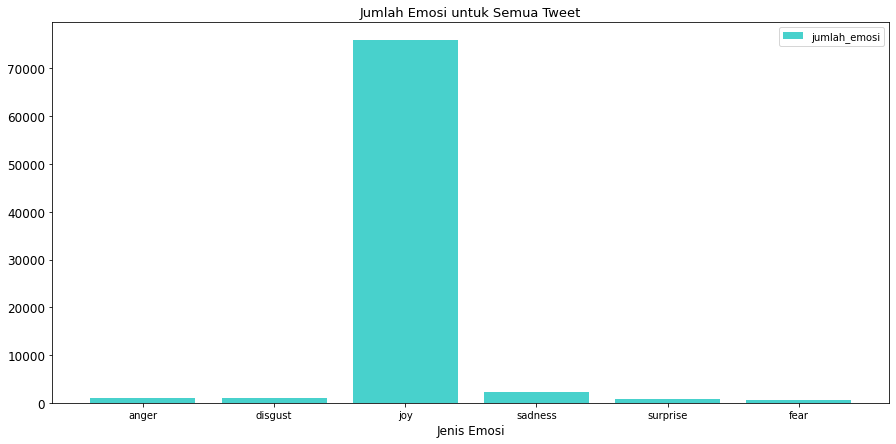

In [ ]:
plt.figure(figsize=(15,7))
plt.ticklabel_format(style = 'plain')
plt.bar(stat["emotions"], stat["value"], color='mediumturquoise')

plt.title('Jumlah Emosi untuk Semua Tweet', size=13)
plt.xlabel("Jenis Emosi",size=12)
plt.yticks(size=12)

plt.legend(["jumlah_emosi"])

plt.show()

In [ ]:
results = data.sort_values(by=["kmeans_cluster"], ascending=False)
results = results[["user_name","text","Emotions","kmeans_cluster"]]

In [ ]:
for cluster in range(0,6):
    cek = results[results["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek["Emotions"].unique())
    print("=======================")

Cluster  1
['joy  ' 'joy  fear  ' 'fear  joy  ']
Cluster  2
['sadness  ' 'disgust  sadness  ' 'sadness  surprise  ' 'anger  sadness  '
 'sadness  fear  ' 'disgust  sadness  surprise  fear  '
 'sadness  surprise  fear  ' 'disgust  sadness  fear  '
 'disgust  sadness  surprise  ' 'disgust  fear  sadness  ']
Cluster  3
['joy  sadness  ' 'disgust  joy  sadness  ' 'anger  joy  sadness  '
 'anger  joy  sadness  surprise  ' 'joy  sadness  surprise  '
 'joy  sadness  surprise  fear  '
 'disgust  sadness  surprise  fear  joy  ' 'sadness  joy  '
 'fear  joy  sadness  ' 'joy  surprise  sadness  '
 'disgust  joy  sadness  surprise  ' 'joy  sadness  fear  '
 'anger  surprise  joy  sadness  ' 'anger  joy  surprise  sadness  '
 'joy  fear  sadness  ' 'disgust  joy  sadness  fear  '
 'anger  sadness  joy  ' 'disgust  fear  sadness  joy  '
 'sadness  surprise  joy  ' 'disgust  sadness  joy  ']
Cluster  4
['anger  ' 'anger  disgust  ' 'anger  disgust  joy  '
 'anger  disgust  fear  joy  ' 'anger  joy  '

In [ ]:
for cluster in range(0,6):
    cek = results[results["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek["Emotions"].unique())
    anger = 0
    disgust = 0
    joy = 0
    sadness = 0
    surprise = 0
    fear = 0
    for em in cek["Emotions"]:
        if bool(re.findall("anger", em)):
            anger += 1
        if bool(re.findall("disgust", em)):
            disgust += 1
        if bool(re.findall("joy", em)):
            joy += 1
        if bool(re.findall("sadness", em)):
            sadness += 1
        if bool(re.findall("surprise", em)):
            surprise += 1
        if bool(re.findall("fear", em)):
            fear += 1
        
    print("Jumlah anger: ", anger)
    print("Jumlah disgust: ", disgust)
    print("Jumlah joy: ", joy)
    print("Jumlah sadness: ", sadness)
    print("Jumlah surprise: ", surprise)
    print("Jumlah fear: ", fear)
    print("=======================")

Cluster  1
['joy  ' 'joy  fear  ' 'fear  joy  ']
Jumlah anger:  0
Jumlah disgust:  0
Jumlah joy:  73371
Jumlah sadness:  0
Jumlah surprise:  0
Jumlah fear:  97
Cluster  2
['sadness  ' 'disgust  sadness  ' 'sadness  surprise  ' 'anger  sadness  '
 'sadness  fear  ' 'disgust  sadness  surprise  fear  '
 'sadness  surprise  fear  ' 'disgust  sadness  fear  '
 'disgust  sadness  surprise  ' 'disgust  fear  sadness  ']
Jumlah anger:  23
Jumlah disgust:  51
Jumlah joy:  0
Jumlah sadness:  856
Jumlah surprise:  39
Jumlah fear:  19
Cluster  3
['joy  sadness  ' 'disgust  joy  sadness  ' 'anger  joy  sadness  '
 'anger  joy  sadness  surprise  ' 'joy  sadness  surprise  '
 'joy  sadness  surprise  fear  '
 'disgust  sadness  surprise  fear  joy  ' 'sadness  joy  '
 'fear  joy  sadness  ' 'joy  surprise  sadness  '
 'disgust  joy  sadness  surprise  ' 'joy  sadness  fear  '
 'anger  surprise  joy  sadness  ' 'anger  joy  surprise  sadness  '
 'joy  fear  sadness  ' 'disgust  joy  sadness  fear  '

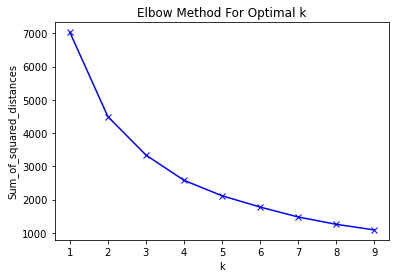

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K = 2

In [ ]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, max_iter=10000, n_init=100, random_state=42).fit(X)
km

KMeans(max_iter=10000, n_clusters=2, n_init=100, random_state=42)

In [ ]:
Counter(km.labels_)

Counter({0: 74290, 1: 3145})

In [ ]:
exp = pd.DataFrame()
exp["user_name"] = data["user_name"]
exp["text"] = data["text"]
exp["Emotions"] = data["Emotions"]
exp['kmeans_cluster'] = km.labels_

In [ ]:
exp.head(5)

user_name  \
0   the _ûndër-ratèd niggáh👊🏾   
1  Best uncle on planet earth   
2                      marcie   
3                    YoMo.Mdp   
4             Laura Reactions   

                                                text  \
0  when life hits and the same time poverty strik...   
1         that marble episode of squidgame ruined me   
2                                     squidgame time   
3  blood on 1st slide i m joining the squidgame t...   
4  the two first games players were killed by the...   

                               Emotions  kmeans_cluster  
0                                 joy                 0  
1  anger  disgust  fear  joy  sadness                 1  
2                                 joy                 0  
3                                 joy                 0  
4                                 joy                 0

In [ ]:
res_exp = exp.sort_values(by=["kmeans_cluster"], ascending=False)
res_exp = res_exp[["user_name","text","Emotions","kmeans_cluster"]]

In [ ]:
for cluster in range(0,2):
    cek_exp = res_exp[res_exp["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek_exp["Emotions"].unique())
    print()
    print("Jumlah data: ")
    print(cek_exp["Emotions"].value_counts())
    print("=======================")

Cluster  1
['joy  ' 'anger  joy  ' 'anger  joy  surprise  ' 'joy  surprise  '
 'disgust  joy  ' 'joy  fear  ' 'disgust  joy  surprise  ' 'fear  joy  '
 'anger  joy  fear  ' 'joy  surprise  fear  ' 'disgust  fear  joy  '
 'anger  fear  joy  ' 'joy  fear  surprise  ' 'disgust  joy  fear  '
 'fear  joy  surprise  ']

Jumlah data: 
joy                         73274
joy  surprise                 319
disgust  joy                  274
anger  joy                    224
joy  fear                      70
joy  surprise  fear            36
fear  joy                      27
disgust  joy  surprise         21
anger  joy  surprise           20
anger  fear  joy                8
disgust  joy  fear              6
disgust  fear  joy              5
anger  joy  fear                4
joy  fear  surprise             1
fear  joy  surprise             1
Name: Emotions, dtype: int64
Cluster  2
['joy  sadness  ' 'sadness  ' 'anger  disgust  joy  ' 'anger  '
 'surprise  fear  ' 'surprise  ' 'disgust  '
 'anger  di

In [ ]:
for cluster in range(0,2):
    cek_exp = res_exp[res_exp["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek["Emotions"].unique())
    anger = 0
    disgust = 0
    joy = 0
    sadness = 0
    surprise = 0
    fear = 0
    for em in cek_exp["Emotions"]:
        if bool(re.findall("anger", em)):
            anger += 1
        if bool(re.findall("disgust", em)):
            disgust += 1
        if bool(re.findall("joy", em)):
            joy += 1
        if bool(re.findall("sadness", em)):
            sadness += 1
        if bool(re.findall("surprise", em)):
            surprise += 1
        if bool(re.findall("fear", em)):
            fear += 1
        
    print("Jumlah anger: ", anger)
    print("Jumlah disgust: ", disgust)
    print("Jumlah joy: ", joy)
    print("Jumlah sadness: ", sadness)
    print("Jumlah surprise: ", surprise)
    print("Jumlah fear: ", fear)
    print("=======================")

Cluster  1
['anger  surprise  ' 'surprise  ' 'disgust  joy  surprise  '
 'joy  surprise  fear  ' 'joy  surprise  ' 'surprise  fear  '
 'anger  joy  surprise  ' 'joy  fear  surprise  '
 'disgust  joy  surprise  fear  ' 'disgust  surprise  fear  '
 'fear  joy  surprise  ']
Jumlah anger:  256
Jumlah disgust:  306
Jumlah joy:  74290
Jumlah sadness:  0
Jumlah surprise:  398
Jumlah fear:  158
Cluster  2
['anger  surprise  ' 'surprise  ' 'disgust  joy  surprise  '
 'joy  surprise  fear  ' 'joy  surprise  ' 'surprise  fear  '
 'anger  joy  surprise  ' 'joy  fear  surprise  '
 'disgust  joy  surprise  fear  ' 'disgust  surprise  fear  '
 'fear  joy  surprise  ']
Jumlah anger:  724
Jumlah disgust:  733
Jumlah joy:  1587
Jumlah sadness:  2216
Jumlah surprise:  377
Jumlah fear:  440
